In [1]:

# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Reading Data from csv file
main_data = pd.read_csv("Exercise-CarData.csv")
print("\nMain Data :-\n", main_data)

print("\nMain Data statistics:-\n", main_data.describe())


Main Data :-
       Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86       1.0          0  1300   
1435        1435   6950  76.0      1   Petrol  110       0.0          0  1600   

      Doors 

In [3]:
# Seprating Input and Output attributes from main data
X = main_data.iloc[:, :-1].values 
Y = main_data.iloc[:, -1].values 

print("\n\nInput Data:- \n", X) 
print("\n\nOutput Data:- \n", Y) 

X_new = main_data.iloc[:, 2:6].values
print("\n\nX for transformation :- \n", X_new)



Input Data:- 
 [[0 13500 23.0 ... 0 2000 'three']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 nan ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


Output Data:- 
 [1165 1165 1165 ... 1015 1015 1114]


X for transformation :- 
 [[23.0 '46986' 'Diesel' '90']
 [23.0 '72937' 'Diesel' '90']
 [24.0 '41711' 'Diesel' '90']
 ...
 [nan '17016' 'Petrol' '86']
 [70.0 '??' nan '86']
 [76.0 '1' 'Petrol' '110']]


In [4]:
# processing columns which are unused.
from sklearn.impute import SimpleImputer

# using the sklearn.impute => SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer = imputer.fit(X[:, [2, 6]])
print(f"\nImputer :- {imputer}")


Imputer :- SimpleImputer()


In [5]:
# Transforming data for columns 2 to 6
X[:, [2, 6]] = imputer.transform(X[:, [2, 6]])
print(f"\n\nX is :- {X}")

imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")

imputer = imputer.fit(X[:, [4, 9]])
print(f"\n\nImputer :- {imputer}")



X is :- [[0 13500 23.0 ... 0 2000 'three']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 55.67215568862275 ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


Imputer :- SimpleImputer(strategy='most_frequent')


In [6]:
# Transforming data for columns 4 to 9
X[:, [4, 9]] = imputer.transform(X[:, [4, 9]])
print(f"\n\nX is :- {X}") 



X is :- [[0 13500 23.0 ... 0 2000 'three']
 [1 13750 23.0 ... 0 2000 '3']
 [2 13950 24.0 ... 0 2000 '3']
 ...
 [1433 8500 55.67215568862275 ... 0 1300 '3']
 [1434 7250 70.0 ... 0 1300 '3']
 [1435 6950 76.0 ... 0 1600 '5']]


In [7]:
# MinMaxScaler and StandardScaler Libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_temp = X[:, [1, 2, 6, 7, 8]]

In [8]:
# building scaler object
scaler = MinMaxScaler()

In [9]:
# scaling x_temp
scaled_x = scaler.fit_transform(X_temp)
print(f"\n\nScaled _x :- {scaled_x}")



Scaled _x :- [[0.3250444  0.27848101 1.         0.         1.        ]
 [0.3339254  0.27848101 1.         0.         1.        ]
 [0.3410302  0.29113924 0.67496112 0.         1.        ]
 ...
 [0.14742451 0.6920526  0.         0.         0.        ]
 [0.10301954 0.87341772 1.         0.         0.        ]
 [0.09236234 0.94936709 0.         0.         0.42857143]]


In [10]:
# doing standard scaler
stad = StandardScaler()
std_x = stad.fit_transform(scaled_x)
print(f"\n\nstandard x :- {std_x}")



standard x :- [[ 7.63762679e-01 -1.82280225e+00  7.33305621e-01 -2.42893084e-01
   2.31497633e+00]
 [ 8.32714853e-01 -1.82280225e+00  7.33305621e-01 -2.42893084e-01
   2.31497633e+00]
 [ 8.87876592e-01 -1.76701156e+00  0.00000000e+00 -2.42893084e-01
   2.31497633e+00]
 ...
 [-6.15280799e-01 -4.89326897e-16 -1.52274947e+00 -2.42893084e-01
  -1.42599356e+00]
 [-9.60041669e-01  7.99360384e-01  7.33305621e-01 -2.42893084e-01
  -1.42599356e+00]
 [-1.04278428e+00  1.13410455e+00 -1.52274947e+00 -2.42893084e-01
   1.77279249e-01]]


In [11]:
# Labeling
from sklearn import preprocessing

label_encode = preprocessing.LabelEncoder()
X[ : , 4] = label_encode.fit_transform(X[ : ,4])
X[ : , 9] = label_encode.fit_transform(X[ : ,9])

In [12]:
# dummy columns for Doors
duplicate_data = pd.get_dummies(main_data['Doors'])
print(f"\n\nDuplicate Data :- {duplicate_data}")
main_data = main_data.drop(['Doors', ], axis = 1)
main_data = pd.concat([duplicate_data, main_data], axis = 1)



Duplicate Data :-       2  3  4  5  five  four  three
0     0  0  0  0     0     0      1
1     0  1  0  0     0     0      0
2     0  1  0  0     0     0      0
3     0  1  0  0     0     0      0
4     0  1  0  0     0     0      0
...  .. .. .. ..   ...   ...    ...
1431  0  1  0  0     0     0      0
1432  0  1  0  0     0     0      0
1433  0  1  0  0     0     0      0
1434  0  1  0  0     0     0      0
1435  0  0  0  1     0     0      0

[1436 rows x 7 columns]




Data :-       Unnamed: 0  Price   Age     KM FuelType   HP  MetColor  Automatic    CC  \
0              0  13500  23.0  46986   Diesel   90       1.0          0  2000   
1              1  13750  23.0  72937   Diesel   90       1.0          0  2000   
2              2  13950  24.0  41711   Diesel   90       NaN          0  2000   
3              3  14950  26.0  48000   Diesel   90       0.0          0  2000   
4              4  13750  30.0  38500   Diesel   90       0.0          0  2000   
...          ...    ...   ...    ...      ...  ...       ...        ...   ...   
1431        1431   7500   NaN  20544   Petrol   86       1.0          0  1300   
1432        1432  10845  72.0     ??   Petrol   86       0.0          0  1300   
1433        1433   8500   NaN  17016   Petrol   86       0.0          0  1300   
1434        1434   7250  70.0     ??      NaN   86       1.0          0  1300   
1435        1435   6950  76.0      1   Petrol  110       0.0          0  1600   

      Doors  Weig

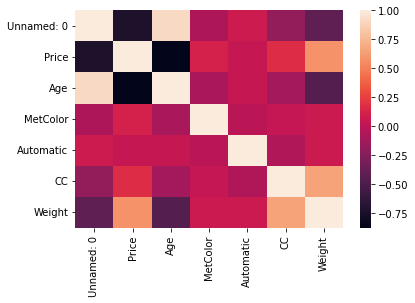

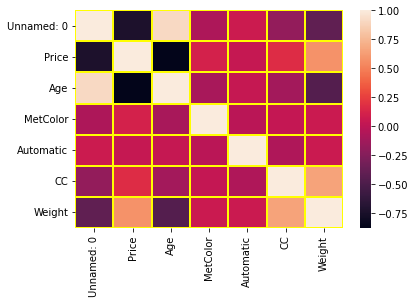

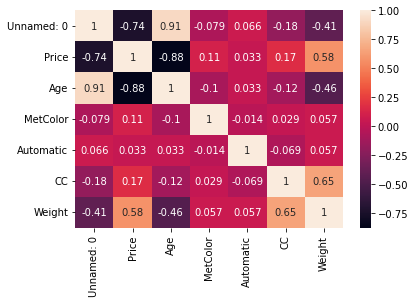



Columns are [ True  True False  True  True  True  True]




In [18]:

import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt

data_corr = pd.read_csv('Exercise-CarData.csv')

print(f"\n\nData :- {data_corr}\n\n")

corr = data_corr.corr()
corr.head()

linewidths = 2
linecolor = "yellow"

sns.heatmap(corr)
plt.show()
sns.heatmap(corr, linewidths = linewidths, linecolor = linecolor)
plt.show()
sns.heatmap(corr, annot = True)
plt.show()

columns = np.full((corr.shape[0], ), True, dtype = bool)
for i in range(corr.shape[0]):
    for j in range(i + 1, corr.shape[0]):
        if (corr.iloc[i, j] >= 0.9):
            if (columns[j]):
                columns[j] = False

print(f"\n\nColumns are {columns}\n\n")

